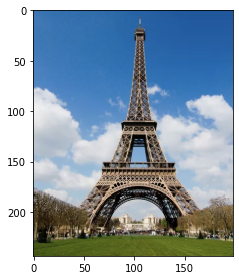

/Users/suzannezhen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in true_divide


CONVERGED
Final centroids are {0: array([0.31121245, 0.29824507, 0.179842  ], dtype=float32), 1: array([0.46591794, 0.5936176 , 0.7357601 ], dtype=float32)}
SSE is 13847.201841757633


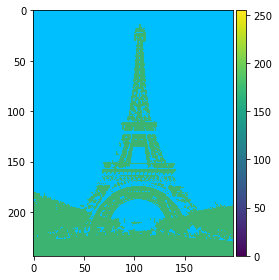

CONVERGED
Final centroids are {0: array([0.1673204 , 0.14329064, 0.09854791], dtype=float32), 1: array([0.39653435, 0.38425547, 0.23950924], dtype=float32), 2: array([0.46378857, 0.59624636, 0.74351573], dtype=float32)}
SSE is 13090.374475442804


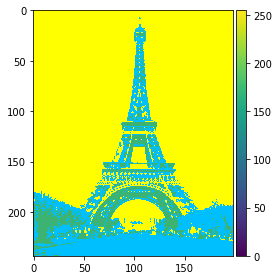

Final centroids are {0: array([0.1411645 , 0.11724123, 0.08496983], dtype=float32), 1: array([0.34938228, 0.3486298 , 0.18315108], dtype=float32), 2: array([0.54898775, 0.49274665, 0.43381175], dtype=float32), 3: array([0.5786826 , 0.66638505, 0.76517546], dtype=float32), 4: array([0.20827304, 0.43989056, 0.69172347], dtype=float32), 5: array([0.7901302, 0.8115404, 0.8416424], dtype=float32)}
SSE is 4470.893049702281


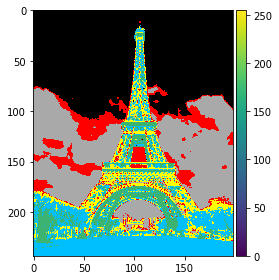

CONVERGED
Final centroids are {0: array([0.10602425, 0.08644359, 0.06290101], dtype=float32), 1: array([0.27970654, 0.24305248, 0.18057445], dtype=float32), 2: array([0.35048386, 0.39143705, 0.12762477], dtype=float32), 3: array([0.44683567, 0.3980481 , 0.33680886], dtype=float32), 4: array([0.16401646, 0.39949352, 0.6602929 ], dtype=float32), 5: array([0.25201872, 0.4818479 , 0.7253872 ], dtype=float32), 6: array([0.63353765, 0.5719115 , 0.5130139 ], dtype=float32), 7: array([0.44051546, 0.6003353 , 0.7820748 ], dtype=float32), 8: array([0.7088219 , 0.7555942 , 0.80711716], dtype=float32), 9: array([0.83379215, 0.8455688 , 0.8685621 ], dtype=float32)}
SSE is 2950.8544671377167


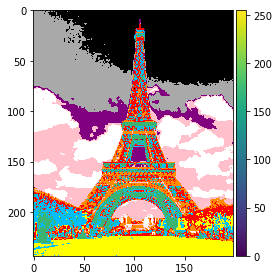

In [50]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 



def normalization_min_max(dataset, xMin, xMax, newMin, newMax):
    norm_data = []
    for x in range(len(dataset)):
        norm = ((dataset[x] - xMin)/(xMax-xMin))*(newMax-newMin)+newMin
        norm_data.append(norm)
    return(np.array(norm_data))


class K_Means:
    def __init__(self, k, centers, tol=0.001, n_iter=50):
        self.k = k
        self.centers = centers
        self.tol = tol
        self.n_iter = n_iter

    def fit(self,data):
        #initiate centroids
        self.centroids = {}
        #print(self.centers[0].shape)
        for i in range(self.k):
            self.centroids[i] = self.centers[i]
        
        
        #create dictionary to store centroids and their datapoints for each iteration
        for i in range(self.n_iter):
            #print('ITER',i)
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []
                
            self.classification_num_list = []
            for instance in data:
                distances = [np.linalg.norm(instance-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classification_num_list.append(classification)
                self.classifications[classification].append(instance)
            
            
            #store centroids for all iterations
            prev_centroids = dict(self.centroids)
            #print(prev_centroids)
    
            
            #compute the mean of each cluster to be the new centroids
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            #if the centroids have moved less than 0.001 then model is optimized 
            #print('updated centroids', self.centroids)
            
            converged = True

            for i in self.centroids:
                original_centroid = prev_centroids[i]
                current_centroid = self.centroids[i]
                #check for tolerance, if new centroids have moved more than 0.001 then it hasn't converged
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    converged = False

            if converged:
                print("CONVERGED")
                break
        return(print('Final centroids are', self.centroids), self.classifications, self.classification_num_list)

    def SSE(self):
        SSE = 0 
        for centroid in self.centroids:
            for i in self.classifications[centroid]:
                SSE += np.linalg.norm(i-self.centroids[centroid]) 
        return(print('SSE is', SSE))
    
    def img(self):
        #map the cluster idx to the new rgb color array, reshapr it to reproduce image
        new_array = np.array(list(map(lambda x: color_dict.get(x), self.classification_num_list)))
        new_img = new_array.reshape(244,198,3)
        skimage.io.imshow(new_img)
        plt.show()
    
    
img = skimage.io.imread('paris.png')
skimage.io.imshow(img)
plt.show()

img2 = img.reshape((-1,3))
img2 = np.float32(img2)

norm_img = normalization_min_max(img2, 0, 255, 0, 1)

color_dict = {0:[60, 179, 113], 1:[0, 191, 255], 2:[255, 255, 0], 3:[255, 0, 0], 4:[0, 0, 0], 5:[169, 169, 169], 6:[255, 140, 0], 7:[128, 0, 128], 8:[255, 192, 203], 9:[255, 255, 255]}


cluster_2 = K_Means(2, np.array([[0, 0, 0],[0.1, 0.1, 0.1]]))
cluster_2.fit(norm_img)
cluster_2.SSE()
cluster_2.img()


cluster_3 = K_Means(3, np.array([[0, 0, 0],[0.1, 0.1, 0.1], [0.2, 0.2, 0.2]]))
cluster_3.fit(norm_img)
cluster_3.SSE()
cluster_3.img()


cluster_6 = K_Means(6, np.array([[0, 0, 0],[0.1, 0.1, 0.1], [0.2, 0.2, 0.2], [0.3, 0.3, 0.3], [0.4, 0.4, 0.4], [0.5, 0.5, 0.5]]))
cluster_6.fit(norm_img)
cluster_6.SSE()
cluster_6.img()


cluster_10 = K_Means(10, np.array([[0, 0, 0],[0.1, 0.1, 0.1], [0.2, 0.2, 0.2], [0.3, 0.3, 0.3], [0.4, 0.4, 0.4], [0.5, 0.5, 0.5], [0.6, 0.6, 0.6], [0.7, 0.7, 0.7], [0.8, 0.8, 0.8], [0.9, 0.9, 0.9]]))
cluster_10.fit(norm_img)
cluster_10.SSE()
cluster_10.img()


